# Proyek Klasifikasi Gambar: PlantVillage-Dataset Sebagai Berikut
- **Nama:** Diantya Pitaloka
- **Email:** diantyantyaa@gmail.com
- **ID Dicoding:** diantyap

## Import Semua Packages atau Library yang Digunakan

Menggunakan tensorflow 2.15 karena 2.17 selalu membuat colab crash ketika save ke tflite. (Berdasarkan forum diskusi dan pengalaman pribadi).

In [33]:
!pip install tensorflowjs

  Using cached tensorflow-2.16.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.4.1-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.16.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (590.6 MB)
Using cached keras-3.4.1-py3-none-any.whl (1.1 MB)
Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Atte

In [4]:
!pip install tensorflow==2.15.0

  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorb

Melakukan import library yang digunakan untuk keseluruhan proyek.

In [ ]:
# Import standard libraries sebagai berikut 
import os
import random
import shutil
import pathlib

# Import PIL for image processing sebagai berikut
from PIL import Image

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import TensorFlow and Keras libraries sebagai berikut
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0, MobileNetV2

In [2]:
print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.15.0


## Data Preparation

### Data Loading

Dataset original bersumber dari [GitHub](https://github.com/spMohanty/PlantVillage-Dataset). Namun dataset sudah diupload ke google drive pribadi agar memudahkan untuk didownload.

In [ ]:
# Download File sebagai berikut
!gdown 1-2-c46EfXP8RYZkEFFUmDb5-oB1sEByq

Downloading...
From (original): https://drive.google.com/uc?id=1-2-c46EfXP8RYZkEFFUmDb5-oB1sEByq
From (redirected): https://drive.google.com/uc?id=1-2-c46EfXP8RYZkEFFUmDb5-oB1sEByq&confirm=t&uuid=0380f57c-0161-4794-a2af-a752b94dd957
To: /content/color.zip
100% 854M/854M [00:05<00:00, 165MB/s]


Melakukan unzip terhadap file hasil download.

In [ ]:
# Unzip File sebagai berikut
!unzip color.zip

Streaming output truncated to the last 5000 lines.
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11030437-942c-4cb4-a40e-b35236778a4b___UF.GRC_YLCV_Lab 02923.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1104914f-f715-4b02-b551-5cdf03f54bcb___YLCV_NREC 2717.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11061195-ce9c-4171-819d-663342a186e8___YLCV_NREC 0257.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/110c50e6-039e-4f32-bda1-26262968ab8a___YLCV_GCREC 5539.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1114e83e-5477-483c-8bed-847b2c169c9f___YLCV_NREC 2257.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/111d4096-e9eb-4f32-9a25-f3c19b92c627___YLCV_GCREC 2209.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1126f296-0c84-4f9d-b66b-1e9a91794ec9___UF.GRC_YLCV_Lab 09340.JPG  
  inflating: color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/112779d4-27f3-4c5e-8813-b64d26ef7e03___UF.GRC_YLC

Membuat fungsi untuk menampilkan jumlah gambar dari masing-masing kelas dan menghitung jumlah gambar dengan resolusi tertentu.

In [ ]:
def count_images_and_resolution(base_path, target_resolution=None):
    # Dictionary untuk menyimpan jumlah gambar per kelas sebagai berikut
    class_count = {}

    # Dictionary untuk menyimpan jumlah gambar per resolusi sebagai berikut
    resolution_count = {}

    for root, dirs, files in os.walk(base_path):
        # Mengabaikan folder root yang tidak memiliki gambar sebagai berikut
        if root == base_path:
            continue
        class_name = os.path.basename(root)
        class_count[class_name] = len(files)

        for file in files:
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                width, height = img.size
                resolution = f"{width}x{height}"
                if resolution not in resolution_count:
                    resolution_count[resolution] = 0
                resolution_count[resolution] += 1

                # Menghitung jumlah gambar dengan resolusi target_resolution sebagai berikut
                if target_resolution and resolution == target_resolution:
                    if 'target' not in resolution_count:
                        resolution_count['target'] = 0
                    resolution_count['target'] += 1

    return class_count, resolution_count

# Path ke folder utama sebagai berikut
base_path = "/content/color"

# Resolusi yang ingin dihitung sebagai berikut
target_resolution = "256x256"

class_count, resolution_count = count_images_and_resolution(base_path, target_resolution)

# Menampilkan hasil sebagai berikut
print("Jumlah gambar per kelas:")
for class_name, count in class_count.items():
    print(f"{class_name}: {count}")

print("\nJumlah gambar per resolusi:")
for resolution, count in resolution_count.items():
    print(f"{resolution}: {count}")


Jumlah gambar per kelas:
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076
Orange___Haunglongbing_(Citrus_greening): 5507
Tomato___Early_blight: 1000
Tomato___Septoria_leaf_spot: 1771
Tomato___Tomato_mosaic_virus: 373
Potato___Early_blight: 1000
Pepper,_bell___Bacterial_spot: 997
Tomato___healthy: 1591
Apple___Cedar_apple_rust: 275
Grape___Black_rot: 1180
Tomato___Bacterial_spot: 2127
Apple___healthy: 1645
Apple___Apple_scab: 630
Corn_(maize)___Common_rust_: 1192
Grape___healthy: 423
Tomato___Spider_mites Two-spotted_spider_mite: 1676
Potato___healthy: 152
Squash___Powdery_mildew: 1835
Grape___Esca_(Black_Measles): 1383
Strawberry___healthy: 456
Corn_(maize)___healthy: 1162
Pepper,_bell___healthy: 1478
Peach___healthy: 360
Soybean___healthy: 5090
Blueberry___healthy: 1502
Tomato___Target_Spot: 1404
Corn_(maize)___Northern_Leaf_Blight: 985
Tomato___Late_blight: 1909
Tomato___Leaf_Mold: 952
Cherry_(including_sour)___Powdery_mildew: 1052
Strawberry___Leaf_scorch: 1109
Potato___Late_blight:

Terdapat 54305 gambar yang terbagi menjadi 38 kelas berbeda. Setiap gambar di masing-masing kelas memiliki resolusi 256x256.

Karena pada submission dicoding harus terdapat gambar dengan resolusi yang berbeda-beda maka dilakukan perubahan resolusi dari masing-masing gambar secara manual.

Gambar diubah dengan resolusi antara 200 hingga 256. Gambar original akan ditimpa oleh gambar yang resolusi nya telah diubah sehingga tidak menambah jumlah dataset.

In [ ]:
def resize_and_replace_images(base_path, min_res=200, max_res=256):
    for root, dirs, files in os.walk(base_path):
        for file in files:
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:

                new_width = random.randint(min_res, max_res)
                new_height = random.randint(min_res, max_res)

                # Ubah ukuran gambar sebagai berikut
                resized_img = img.resize((new_width, new_height), Image.ANTIALIAS)

                # Simpan gambar yang sudah diubah sebagai berikut
                resized_img.save(file_path)

# Path ke folder utama sebagai berikut
base_path = "/content/color"

resize_and_replace_images(base_path)

<ipython-input-6-9df98553e62b>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize((new_width, new_height), Image.ANTIALIAS)


Menampilkan kembali jumlah gambar untuk masing-masing resolusi.

In [ ]:
def count_images_and_resolution(base_path, target_resolution=None):
    # Dictionary untuk menyimpan jumlah gambar per kelas sebagai berikut
    class_count = {}

    # Dictionary untuk menyimpan jumlah gambar per resolusi sebagai berikut
    resolution_count = {}

    for root, dirs, files in os.walk(base_path):
        # Mengabaikan folder root yang tidak memiliki gambar sebagai berikut
        if root == base_path:
            continue
        class_name = os.path.basename(root)
        class_count[class_name] = len(files)

        for file in files:
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                width, height = img.size
                resolution = f"{width}x{height}"
                if resolution not in resolution_count:
                    resolution_count[resolution] = 0
                resolution_count[resolution] += 1

                # Hitung jumlah gambar dengan resolusi target_resolution sebagai berikut
                if target_resolution and resolution == target_resolution:
                    if 'target' not in resolution_count:
                        resolution_count['target'] = 0
                    resolution_count['target'] += 1

    return class_count, resolution_count

# Path ke folder utama sebagai berikut
base_path = "/content/color"

# Resolusi yang ingin dihitung sebagai berikut
target_resolution = "256x256"

class_count, resolution_count = count_images_and_resolution(base_path, target_resolution)

print("\nJumlah gambar per resolusi:")
for resolution, count in resolution_count.items():
    print(f"{resolution}: {count}")



Jumlah gambar per resolusi:
251x256: 18
218x210: 18
256x224: 16
227x202: 17
253x220: 20
221x223: 19
213x241: 19
233x218: 19
222x227: 19
214x212: 16
245x252: 18
222x226: 24
215x232: 17
222x220: 24
248x211: 19
237x211: 11
220x235: 27
206x204: 17
200x202: 25
230x208: 10
250x200: 25
231x251: 13
238x207: 21
254x239: 16
216x204: 28
254x234: 23
250x251: 13
207x202: 20
235x233: 16
225x241: 17
202x253: 13
254x256: 19
249x244: 23
256x225: 21
254x229: 18
206x233: 15
211x250: 14
211x200: 24
205x221: 17
245x227: 13
245x245: 24
205x222: 22
209x246: 17
247x236: 11
229x201: 20
215x215: 17
222x250: 18
204x249: 19
229x217: 22
213x219: 19
245x203: 27
210x244: 21
251x238: 17
224x250: 14
250x229: 20
246x227: 24
230x239: 22
209x203: 10
212x251: 19
217x209: 15
219x221: 13
207x228: 15
249x209: 16
225x202: 21
204x216: 10
206x228: 30
244x256: 20
243x251: 13
209x238: 16
235x238: 21
202x233: 20
205x228: 18
248x254: 18
226x200: 13
206x209: 14
235x244: 21
239x212: 14
212x212: 15
221x236: 15
251x203: 21
200x206: 18

Terlihat bahwa sekarang gambar sudah memiliki resolusi yang bervariasi.

### Data Preprocessing

Secara total terdapat 14 jenis tanaman yang berbeda. Namun pada proyek kali ini akan fokus ke tanaman tomat saja.

In [ ]:
def count_images(base_path, target_class="tomato"):
    total_count = 0
    target_class_count = 0

    for root, dirs, files in os.walk(base_path):
        total_count += len(files)
        if target_class.lower() in root.lower():
            target_class_count += len(files)

    return total_count, target_class_count

# Path ke folder utama sebagai berikut
base_path = "/content/color"

total_count, target_class_count = count_images(base_path)

# Menampilkan hasil sebagai berikut
print(f"Jumlah total gambar dalam dataset: {total_count}")
print(f"Jumlah gambar dalam kelas 'tomato': {target_class_count}")


Jumlah total gambar dalam dataset: 54305
Jumlah gambar dalam kelas 'tomato': 18160


Menampilkan jumlah gambar untuk masing-masing subkelas dari tanaman tomat.

In [ ]:
def count_tomato_images_per_subclass(base_path, target_class="tomato"):
    class_count = {}

    for root, dirs, files in os.walk(base_path):
        if target_class.lower() in root.lower():
            subclass_name = os.path.basename(root)
            if subclass_name not in class_count:
                class_count[subclass_name] = 0
            class_count[subclass_name] += len(files)

    return class_count

# Path ke folder utama sebagai berikut
base_path = "/content/color"

tomato_class_count = count_tomato_images_per_subclass(base_path)

# Menampilkan hasil sebagai berikut
print("Jumlah gambar dalam kelas 'tomato' untuk masing-masing subkelas:")
for subclass, count in tomato_class_count.items():
    print(f"{subclass}: {count}")


Jumlah gambar dalam kelas 'tomato' untuk masing-masing subkelas:
Tomato___Early_blight: 1000
Tomato___Septoria_leaf_spot: 1771
Tomato___Tomato_mosaic_virus: 373
Tomato___healthy: 1591
Tomato___Bacterial_spot: 2127
Tomato___Spider_mites Two-spotted_spider_mite: 1676
Tomato___Target_Spot: 1404
Tomato___Late_blight: 1909
Tomato___Leaf_Mold: 952
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357


Memindahkan folder tanaman tomat dari /color ke /dataset

In [ ]:
def copy_tomato_folders(base_path, target_folder="dataset", target_class="tomato"):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for root, dirs, files in os.walk(base_path):
        for dir_name in dirs:
            if target_class.lower() in dir_name.lower():
                source_path = os.path.join(root, dir_name)
                dest_path = os.path.join(target_folder, dir_name)
                if not os.path.exists(dest_path):
                    shutil.copytree(source_path, dest_path)
                    print(f"Menyalin {source_path} ke {dest_path}")

# Path ke folder utama sebagai berikut
base_path = "/content/color"

# Path ke folder tujuan sebagai berikut
target_folder = "/content/dataset"

copy_tomato_folders(base_path, target_folder)

Menyalin /content/color/Tomato___Early_blight ke /content/dataset/Tomato___Early_blight
Menyalin /content/color/Tomato___Septoria_leaf_spot ke /content/dataset/Tomato___Septoria_leaf_spot
Menyalin /content/color/Tomato___Tomato_mosaic_virus ke /content/dataset/Tomato___Tomato_mosaic_virus
Menyalin /content/color/Tomato___healthy ke /content/dataset/Tomato___healthy
Menyalin /content/color/Tomato___Bacterial_spot ke /content/dataset/Tomato___Bacterial_spot
Menyalin /content/color/Tomato___Spider_mites Two-spotted_spider_mite ke /content/dataset/Tomato___Spider_mites Two-spotted_spider_mite
Menyalin /content/color/Tomato___Target_Spot ke /content/dataset/Tomato___Target_Spot
Menyalin /content/color/Tomato___Late_blight ke /content/dataset/Tomato___Late_blight
Menyalin /content/color/Tomato___Leaf_Mold ke /content/dataset/Tomato___Leaf_Mold
Menyalin /content/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus ke /content/dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus


Menghapus prefix "tomato___".

In [ ]:
def rename_folders(base_path, prefix="Tomato___"):
    for root, dirs, files in os.walk(base_path):
        for dir_name in dirs:
            if dir_name.startswith(prefix):
                new_dir_name = dir_name[len(prefix):]
                old_path = os.path.join(root, dir_name)
                new_path = os.path.join(root, new_dir_name)
                os.rename(old_path, new_path)
                print(f"Renamed {old_path} to {new_path}")

# Path ke folder utama sebagai berikut
base_path = "/content/dataset"

rename_folders(base_path)

Renamed /content/dataset/Tomato___Early_blight to /content/dataset/Early_blight
Renamed /content/dataset/Tomato___Septoria_leaf_spot to /content/dataset/Septoria_leaf_spot
Renamed /content/dataset/Tomato___Tomato_mosaic_virus to /content/dataset/Tomato_mosaic_virus
Renamed /content/dataset/Tomato___healthy to /content/dataset/healthy
Renamed /content/dataset/Tomato___Bacterial_spot to /content/dataset/Bacterial_spot
Renamed /content/dataset/Tomato___Spider_mites Two-spotted_spider_mite to /content/dataset/Spider_mites Two-spotted_spider_mite
Renamed /content/dataset/Tomato___Target_Spot to /content/dataset/Target_Spot
Renamed /content/dataset/Tomato___Late_blight to /content/dataset/Late_blight
Renamed /content/dataset/Tomato___Leaf_Mold to /content/dataset/Leaf_Mold
Renamed /content/dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus to /content/dataset/Tomato_Yellow_Leaf_Curl_Virus


Menampilkan contoh gambar dari masing-masing kelas tomat.

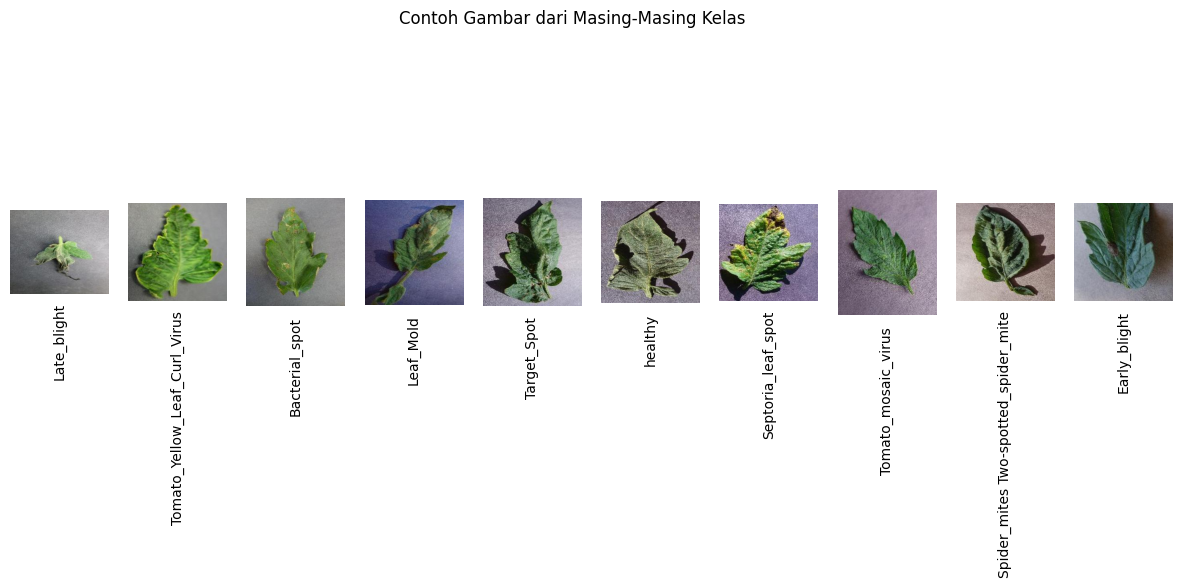

In [ ]:
def show_example_images(base_path):
    class_images = {}

    for root, dirs, files in os.walk(base_path):
        if files:
            class_name = os.path.basename(root)
            random_image = random.choice(files)
            class_images[class_name] = os.path.join(root, random_image)

    fig, axes = plt.subplots(1, len(class_images), figsize=(15, 5))
    fig.suptitle('Contoh Gambar dari Masing-Masing Kelas')

    for ax, (class_name, image_path) in zip(axes, class_images.items()):
        img = Image.open(image_path)
        ax.imshow(img)
        ax.text(0.5, -0.1, class_name, rotation=90, verticalalignment='top', horizontalalignment='center', transform=ax.transAxes)
        ax.axis('off')

    plt.show()

# Path ke folder utama sebagai berikut
base_path = "/content/dataset"

show_example_images(base_path)


#### Split Dataset

Pada proyek dicoding jumlah dataset minimal yang dibutuhkan adalah 10.000 sehingga pada proyek kali ini hanya akan dipilih 4 kelas saja dari tanaman tomat agar meringangkan beban kerja. Kelas yang dipilih dan jumlah akhir dari dataset adalah sebagai berikut:

- Tomato_Yellow_Leaf_Curl_Virus: 5357
- Late_blight: 1909
- healthy: 1591
- Septoria_leaf_spot: 1771

Total = 10628 gambar

Menghapus semua folder kecuali folder yang akan digunakan.

In [13]:
def delete_unwanted_folders(base_path, keep_folders=['Tomato_Yellow_Leaf_Curl_Virus', 'Late_blight','healthy','Septoria_leaf_spot']):
    for item in os.listdir(base_path):
        item_path = os.path.join(base_path, item)
        if os.path.isdir(item_path) and item not in keep_folders:
            shutil.rmtree(item_path)
            print(f"Menghapus folder: {item_path}")

# Path ke folder utama
base_path = "/content/dataset"

delete_unwanted_folders(base_path)

Menghapus folder: /content/dataset/Bacterial_spot
Menghapus folder: /content/dataset/Leaf_Mold
Menghapus folder: /content/dataset/Target_Spot
Menghapus folder: /content/dataset/Tomato_mosaic_virus
Menghapus folder: /content/dataset/Spider_mites Two-spotted_spider_mite
Menghapus folder: /content/dataset/Early_blight


Membagi dataset menjadi train dan test dengan rasio 8:2.

In [14]:
def split_dataset(base_path, train_ratio=0.8):
    # Path untuk dataset pelatihan dan pengujian
    train_path = os.path.join(base_path, 'train')
    test_path = os.path.join(base_path, 'test')

    # Membuat folder train dan test jika belum ada
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    for root, dirs, files in os.walk(base_path):
        if root == base_path:
            continue

        class_name = os.path.basename(root)
        if class_name in ['train', 'test']:
            continue

        # Membuat folder kelas di dalam train dan test
        train_class_path = os.path.join(train_path, class_name)
        test_class_path = os.path.join(test_path, class_name)
        os.makedirs(train_class_path, exist_ok=True)
        os.makedirs(test_class_path, exist_ok=True)

        # Shuffle files
        random.shuffle(files)
        split_index = int(train_ratio * len(files))
        train_files = files[:split_index]
        test_files = files[split_index:]

        # Memindahkan file ke folder train
        for file in train_files:
            src_file = os.path.join(root, file)
            dst_file = os.path.join(train_class_path, file)
            shutil.move(src_file, dst_file)

        # Memindahkan file ke folder test
        for file in test_files:
            src_file = os.path.join(root, file)
            dst_file = os.path.join(test_class_path, file)
            shutil.move(src_file, dst_file)

# Path ke folder utama
base_path = "/content/dataset"

split_dataset(base_path)

Menghapus folder selain folder train dan test.

In [15]:
def delete_unwanted_folders(base_path, keep_folders=['train', 'test']):
    for item in os.listdir(base_path):
        item_path = os.path.join(base_path, item)
        if os.path.isdir(item_path) and item not in keep_folders:
            shutil.rmtree(item_path)
            print(f"Menghapus folder: {item_path}")

# Path ke folder utama
base_path = "/content/dataset"

delete_unwanted_folders(base_path)

Menghapus folder: /content/dataset/Late_blight
Menghapus folder: /content/dataset/Tomato_Yellow_Leaf_Curl_Virus
Menghapus folder: /content/dataset/healthy
Menghapus folder: /content/dataset/Septoria_leaf_spot


## Modelling

Menggunakan ImageDataGenerator untuk melakukan augmentasi, rescale, dan mengubah target size.

Dataset test hanya akan dilakukan rescale.

In [16]:
def augment_and_resize_dataset(base_path, img_size=(150, 150), batch_size=32):
    train_path = os.path.join(base_path, 'train')
    test_path = os.path.join(base_path, 'test')

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Hanya rescale untuk data test
    test_datagen = ImageDataGenerator(rescale=1./255)


    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_generator, test_generator

# Path ke folder utama
base_path = "/content/dataset"

train_generator, test_generator = augment_and_resize_dataset(base_path)

Found 7727 images belonging to 4 classes.
Found 2901 images belonging to 4 classes.


Menampilkan kelas-kelas yang terdapat pada dataset.

In [17]:
class_indices = train_generator.class_indices
print(class_indices)

{'Late_blight': 0, 'Septoria_leaf_spot': 1, 'Tomato_Yellow_Leaf_Curl_Virus': 2, 'healthy': 3}


Menggunakan transferlearning dari MobileNetV2. Input shape yang digunakan adalah 150x150, layers di freeze agar tidak dilatih kembali, dan menambahkan beberapa layer Conv dan Pooling.

In [18]:
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150,150,3))

for layer in pre_trained_model.layers:
    layer.trainable = False

model = Sequential()

model.add(pre_trained_model)

# Menambahkan Conv2D and Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(name="flatten"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation='softmax'))

9406464/9406464 [==============================] - 2s 0us/step


Mengcompile model dengan optimizer Adam, loss categorical_crossentropy, dan metrics accuracy.

In [19]:
# Compile model
optimizer = tf.optimizers.Adam()
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Membuat callbacks yang memonitor val_accuracy dan akan berhenti jika tidak mengalami perubahan selama 3 epochs.

In [20]:
# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.001, restore_best_weights=True, mode='max', baseline=0.96)

Melatih model selama 10 epoch dan menggunakan data test sebagai validation.

In [21]:
# Melatih model
num_epochs = 10

H = model.fit(train_generator,
              epochs=num_epochs,
              validation_data=test_generator,
              callbacks=[checkpoint, early_stopping],
              verbose=1)

Epoch 1/10
242/242 [==============================] - 61s 214ms/step - loss: 0.3379 - accuracy: 0.8706 - val_loss: 0.1350 - val_accuracy: 0.9545
Epoch 2/10
242/242 [==============================] - 49s 203ms/step - loss: 0.1345 - accuracy: 0.9608 - val_loss: 0.1567 - val_accuracy: 0.9507
Epoch 3/10
242/242 [==============================] - 49s 204ms/step - loss: 0.0930 - accuracy: 0.9726 - val_loss: 0.1015 - val_accuracy: 0.9686
Epoch 4/10
242/242 [==============================] - 51s 213ms/step - loss: 0.0893 - accuracy: 0.9730 - val_loss: 0.1007 - val_accuracy: 0.9662
Epoch 5/10
242/242 [==============================] - 50s 205ms/step - loss: 0.0725 - accuracy: 0.9766 - val_loss: 0.0875 - val_accuracy: 0.9693
Epoch 6/10
242/242 [==============================] - 50s 205ms/step - loss: 0.0586 - accuracy: 0.9806 - val_loss: 0.0636 - val_accuracy: 0.9793
Epoch 7/10
242/242 [==============================] - 50s 205ms/step - loss: 0.0632 - accuracy: 0.9836 - val_loss: 0.0713 - val_ac

## Evaluasi dan Visualisasi

Menampilkan grafik train dan val akurasi serta train dan val loss.

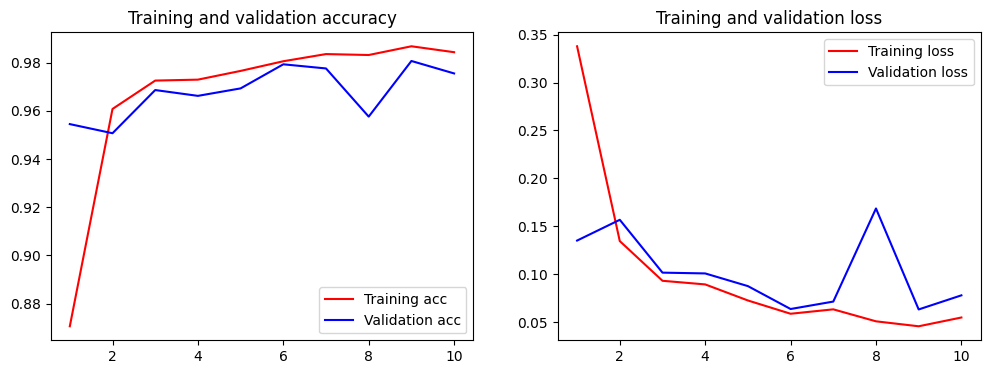

In [22]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_training_history(H)

## Konversi Model

Menyimpan model menjadi format .h5.

In [23]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Konversi TFJS

Konversi model menjadi format TFJS.

In [1]:
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2024-08-06 11:02:08.080962: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 11:02:08.125218: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 11:02:08.125299: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 11:02:08.151578: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 11:02:11.088913: W tensorflow/compiler/tf

### Konversi SavedModel

Konversi menjadi saved_model.

In [25]:
save_path = os.path.join("models/klasifikasi_gambar/1/")
tf.saved_model.save(model, save_path)

### Konversi TF-Lite

Konversi model menjadi format TFLITE dan menyimpan label.txt.

In [26]:
# Load the Keras model
model_TFLITE = tf.keras.models.load_model('model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_TFLITE)
tflite_model = converter.convert()

# Save the converted model to a file
with open("converted_model.tflite", "wb") as f:
    f.write(tflite_model)

In [27]:
# Buat konten yang akan ditulis ke dalam file
content = """Late_blight
Septoria_leaf_spot
Tomato_Yellow_Leaf_Curl_Virus
healthy"""

# Tentukan path dan nama file
file_path = "/content/klasifikasiGambar.txt"

# Tulis konten ke dalam file
with open(file_path, "w") as file:
    file.write(content)

Menjadikan zip agar dapat di download ke local device.

In [7]:
# Specify the folder to zip
folder_modles = '/content/models'
folder_tfjs_model = '/content/tfjs_model'

# Specify the output zip file name (without .zip extension)
output_modles= '/content/models'
output_tfjs_model = '/content/tfjs_model'

# Zip the folder
shutil.make_archive(output_modles, 'zip', folder_modles)
shutil.make_archive(output_tfjs_model, 'zip', folder_tfjs_model)

'/content/tfjs_model.zip'

In [31]:
!pip freeze > requirements.txt

## Inference

Melakukan inference terhadap model yang di deploy menggunakan tensorflow serving.

In [10]:
import tensorflow as tf
import requests
import os

Melakukan prediksi, masing-masing kelas dicoba oleh 1 image.

In [19]:
def images_preprocessing(filenames):
    image_tensors = []
    for filename in filenames:
        image = tf.io.decode_image(open(filename, 'rb').read(), channels=3)
        image = tf.image.resize(image, [150, 150])
        image = image / 255.
        image_tensor = tf.expand_dims(image, 0)
        image_tensors.append(image_tensor)

    # Concatenate all image tensors into a single batch
    batch_tensor = tf.concat(image_tensors, axis=0)
    return batch_tensor.numpy().tolist()

# List of filenames to be processed
filenames = [
    os.path.join('images', 'healthy.jpg'),
    os.path.join('images', 'Late_blight.jpg'),
    os.path.join('images', 'Septoria_leaf_spot.jpg'),
    os.path.join('images', 'Tomato_Yellow_Leaf_Curl_Virus.jpg')
]

image_tensors = images_preprocessing(filenames=filenames)

json_data = {
    "instances": image_tensors
}

endpoint = "http://localhost:8501/v1/models/klasifikasi_model:predict"

try:
    response = requests.post(endpoint, json=json_data)
    response.raise_for_status()  # Will raise an error for bad status codes

    predictions = response.json()['predictions']
    map_labels = {0: 'Late_blight', 1: 'Septoria_leaf_spot', 2: 'Tomato_Yellow_Leaf_Curl_Virus', 3: 'healthy'}

    # Iterate through predictions and print the corresponding labels
    for prediction in predictions:
        predicted_class = tf.argmax(prediction).numpy()
        print(map_labels[predicted_class])

except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")


healthy
Late_blight
Septoria_leaf_spot
Tomato_Yellow_Leaf_Curl_Virus
